# Machine Learning application in Geophysical Investigation

Python libraries and also the use of scikit tool can achieve the said goal

Basic libraries such as Numpy, Pandas, Matplotlib, Sklearn, Seaborn, etc., are imported for ease data manipulation.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bruges as br
import seaborn as sns

%matplotlib inline

The print(log_data.iloc[0:5]) give a preview of the data in tabular form,but the log_data.head() captures the whole data without breaking the table.

In [6]:
log_data = pd.read_csv("C:\\Users\\Toyin Obasoro\\Desktop\\Kunle practise\\RES  - Copy.csv")
log_data.head()

,Density(g/cc),Depth(ft),g=10,OverBurden,Pore Pressure,Porosity,Pore Pressure Gradient
0,1.9000,0.0,9.8,0.000000,0.000000,0.470588,0.000000
1,1.9000,94.0,9.8,77.355375,40.723951,0.470588,40.713355
2,1.8778,95.0,9.8,77.264853,41.157185,0.483647,41.146476
3,1.8778,95.5,9.8,77.671510,41.373802,0.483647,41.363036
4,1.8778,96.0,9.8,78.078167,41.590418,0.483647,41.579597


In [8]:
print(log_data.iloc[0:5])

   Density(g/cc)  Depth(ft)  g=10  OverBurden  Pore Pressure  Porosity  \
0         1.9000        0.0   9.8    0.000000       0.000000  0.470588   
1         1.9000       94.0   9.8   77.355375      40.723951  0.470588   
2         1.8778       95.0   9.8   77.264853      41.157185  0.483647   
3         1.8778       95.5   9.8   77.671510      41.373802  0.483647   
4         1.8778       96.0   9.8   78.078167      41.590418  0.483647   

   Pore Pressure Gradient  
0                0.000000  
1               40.713355  
2               41.146476  
3               41.363036  
4               41.579597  


Basic description of the log data to know the number of entries and also hidden information

In [9]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 7 columns):
Density(g/cc)             12200 non-null float64
Depth(ft)                 12200 non-null float64
g=10                      12200 non-null float64
OverBurden                12200 non-null float64
Pore Pressure             12200 non-null float64
Porosity                  12200 non-null float64
Pore Pressure Gradient    12200 non-null float64
dtypes: float64(7)
memory usage: 667.3 KB


In [10]:
log_data.describe()

,Density(g/cc),Depth(ft),g=10,OverBurden,Pore Pressure,Porosity,Pore Pressure Gradient
count,12200.000000,12200.000000,1.220000e+04,12200.000000,12200.000000,12200.000000,12200.000000
mean,2.555113,3143.742254,9.800000e+00,3559.684681,1361.974538,0.085228,1361.620160
std,0.244016,1761.004110,1.971837e-12,2011.742039,762.926018,0.143539,762.727509
min,1.425300,0.000000,9.800000e+00,0.000000,0.000000,-1.134588,0.000000
25%,2.587600,1618.875000,9.800000e+00,1851.853025,701.350923,0.025632,701.168435
50%,2.632500,3143.750000,9.800000e+00,3613.575117,1361.977894,0.039706,1361.623515
75%,2.656425,4668.625000,9.800000e+00,5294.584086,2022.604865,0.066118,2022.078595
max,4.628800,6193.500000,9.800000e+00,7589.715222,2683.231837,0.749824,2682.533675


In [12]:
log_well = log_data
log_well = log_well[['Density(g/cc)', 'Porosity']]
log_well.colunms = ['Density(g/cc)', 'Porosity']
log_well.describe()

C:\Users\Toyin Obasoro\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,Density(g/cc),Porosity
count,12200.000000,12200.000000
mean,2.555113,0.085228
std,0.244016,0.143539
min,1.425300,-1.134588
25%,2.587600,0.025632
50%,2.632500,0.039706
75%,2.656425,0.066118
max,4.628800,0.749824


In [15]:
for x in log_well.columns:
    print(x, log_well[x].isnull().values.any())
print(log_well.isnull().sum())

Density(g/cc) False
Porosity False
Density(g/cc)    0
Porosity         0
dtype: int64


In [21]:
log_well.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Density(g/cc),12200.0,2.555113,0.244016,1.425300,2.587600,2.632500,2.656425,4.628800
Porosity,12200.0,0.085228,0.143539,-1.134588,0.025632,0.039706,0.066118,0.749824


The use of other geostatistic libraries for data visualization and presentation. This would enable for p

In [31]:
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats
from scipy import stats
import scipy.signal as signal
import scipy.stats as st
import math

In [22]:
xmin = 0.0; xmax = 1000.0                       # range of x values
ymin = 0.0; ymax = 1000.0                       # range of y values
denmin = 1.4253; denmax = 4.62288;              # range of density values
pormmin = -1.134588; permmax = 0.749824         # range of porosity values
nx = 100; ny = 100; csize = 10.0
cmap = plt.cm.plasma                            # color map

In [28]:
"""
plt.subplot(221)
GSLIB.locmap_st(log_well,'X','Y','Density(g/cc)',xmin,xmax,ymin,ymax,denmin,denmax,'Well Data - Density', 'X', 'Y', 'Density',cmap)

plt.subplot(222)
GSLIB.locmap_st(log_well,'X', 'Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X', 'Y', 'Porosity (fraction)',cmap)


plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.2, wspace=0.2, hspace=0.2)
plt.show()
"""

"\nplt.subplot(221)\nGSLIB.locmap_st(log_well,'X','Y','Density(g/cc)',xmin,xmax,ymin,ymax,denmin,denmax,'Well Data - Density', 'X', 'Y', 'Density',cmap)\n\nplt.subplot(222)\nGSLIB.locmap_st(log_well,'X', 'Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X', 'Y', 'Porosity (fraction)',cmap)\n\n\nplt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.2, wspace=0.2, hspace=0.2)\nplt.show()\n"

## Linear regression Model on the Data

In [34]:
den = log_well['Density(g/cc)']
por = log_well['Porosity']

In [35]:
slope, intercept, r_value, p_value, std_err = st.linregress(den,por)

print('The model parameters are, slope (b1) = ' + str(round(slope,2)) + ', and the intercept (b0) = ' + str(round(intercept,2)))


The model parameters are, slope (b1) = -0.59, and the intercept (b0) = 1.59


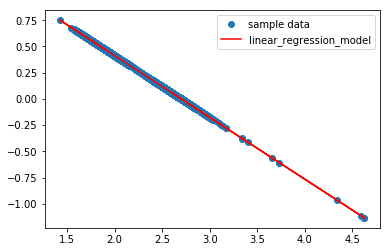

In [38]:
plt.plot(den, por, 'o', label='sample data')
plt.plot(den, intercept + slope*den, 'r', label='linear_regression_model')
plt.xlabel
plt.legend()
plt.show()

To determine the coefficient of correlation,r^2

In [39]:
print('The correlation coefficient is = ' + str(round(r_value,2)) + ' and the r-squared value = ', str(round(r_value**2,2)))

The correlation coefficient is = -1.0 and the r-squared value =  1.0


In [40]:
t_critical = st.t.ppf([0.025,0.975], df=len(den)-2)
print('The t critical lower and upper values are ' + str(t_critical))
print('and the t statistic is ' + str(round(slope/std_err,2)))

The t critical lower and upper values are [-1.96015848  1.96015848]
and the t statistic is -inf


C:\Users\Toyin Obasoro\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
print('The slope confidence interval is ' + str(round(slope,2)) + '+/-' + str(round(t_critical[1] * std_err,2)))
print('The slope P02.5 and P97.5 are ' + str( slope + t_critical*std_err))

The slope confidence interval is -0.59+/-0.0
The slope P02.5 and P97.5 are [-0.58823529 -0.58823529]


Text(0.5, 0, 'Porosity (%)')

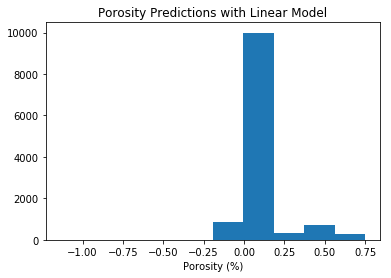

In [42]:
por_hat = slope * den + intercept
plt.hist(por_hat)
plt.title("Porosity Predictions with Linear Model")
plt.xlabel('Porosity (%)')

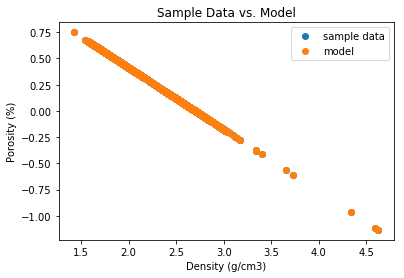

In [43]:
plt.plot(den, por, 'o', label='sample data')
plt.plot(den, por_hat, 'o', label='model')
plt.title('Sample Data vs. Model')
plt.xlabel('Density (g/cm3)')
plt.ylabel('Porosity (%)')
plt.legend()
plt.show()

The average of the residuals is -0.0


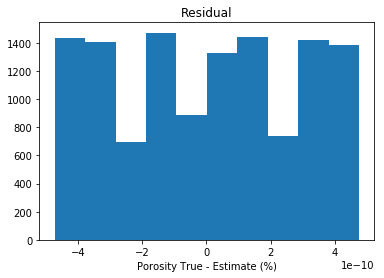

In [44]:
residual = por - por_hat
plt.hist(residual)
plt.title("Residual")
plt.xlabel('Porosity True - Estimate (%)')
print('The average of the residuals is ' + str(round(np.mean(residual),2)))

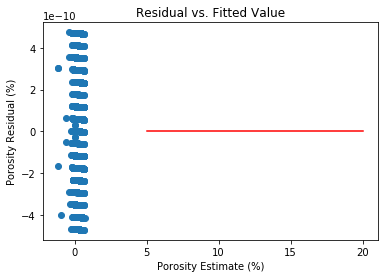

In [45]:
plt.plot(por_hat, residual, 'o')
plt.title('Residual vs. Fitted Value')
plt.xlabel('Porosity Estimate (%)')
plt.ylabel('Porosity Residual (%)')
plt.plot([5,20], [0,0], 'r')
plt.show()

We wouldnow use the sklearn method for linear regression.

In [47]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(log_well, test_size = 0.2, random_state = 42)